#**PROJETO DE ANÁLISE E REGRESSÃO LINEAR**

O projeto representa uma análise completa usando Python e a biblioteca Pandas numa base de dados de preços de aluguéis em São Paulo. Utilizou-se a regressão linear para modelar uma relação entre variáveis do conjunto de dados.

#**Importando pacotes**

In [ ]:
pip install unidecode

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode


#Importando banco de dados

In [ ]:
df_aluguel = pd.read_csv('base-alugueis-sp.csv')
df_aluguel

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


In [ ]:
#olhando as dimensões
df_aluguel.shape

(11657, 8)

In [ ]:
#verificando os tipos de variáveis
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


#**1. Tratamento e Limpeza dos dados**

##Dados ausentes

In [ ]:
df_aluguel.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

Não há dados ausentes no dataframe

## Dropando as colunas 'address' e 'total'

Vamos dropar as colunas 'adress' e 'total' por não serem relevantes para o modelo de previsão do aluguel.

In [ ]:
colunas_dropar = ['address', 'total']
df_aluguel.drop(columns=colunas_dropar, inplace=True)
df_aluguel

,district,area,bedrooms,garage,type,rent
0,Belenzinho,21,1,0,Studio e kitnet,2400
1,Vila Marieta,15,1,1,Studio e kitnet,1030
2,Pinheiros,18,1,0,Apartamento,4000
3,Vila Ré,56,2,2,Casa em condomínio,1750
4,Bela Vista,19,1,0,Studio e kitnet,4000
...,...,...,...,...,...,...
11652,Santo Amaro,94,2,1,Apartamento,4100
11653,Jardim Vitória Régia,350,4,4,Apartamento,11250
11654,Jardim Caravelas,84,1,2,Apartamento,4500
11655,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000


## Transformando a coluna 'type'

Identificando valores únicos na coluna 'type'

In [ ]:
print(df_aluguel['type'].unique())

['Studio e kitnet' 'Apartamento' 'Casa em condomínio' 'Casa']


Deixando os valores em lower case e substituindo o espaço por underscore

In [ ]:
df_aluguel['type'] = df_aluguel['type'].str.lower().str.replace(' ', '_')
df_aluguel

,district,area,bedrooms,garage,type,rent
0,Belenzinho,21,1,0,studio_e_kitnet,2400
1,Vila Marieta,15,1,1,studio_e_kitnet,1030
2,Pinheiros,18,1,0,apartamento,4000
3,Vila Ré,56,2,2,casa_em_condomínio,1750
4,Bela Vista,19,1,0,studio_e_kitnet,4000
...,...,...,...,...,...,...
11652,Santo Amaro,94,2,1,apartamento,4100
11653,Jardim Vitória Régia,350,4,4,apartamento,11250
11654,Jardim Caravelas,84,1,2,apartamento,4500
11655,Jardim Fonte do Morumbi,76,1,0,apartamento,9000


Vamos ver a frequência dos tipos de imóvel

In [ ]:
df_aluguel['type'].value_counts()

type
apartamento           7194
casa                  2841
studio_e_kitnet       1381
casa_em_condomínio     241
Name: count, dtype: int64

Como há poucos valores do tipo 'casa_em_condominio', vamos juntá-lo com o tipo 'casa'

In [ ]:
df_aluguel['type'] = df_aluguel['type'].replace('casa_em_condomínio', 'casa')

Como não há muitos valores únicos, vamos criar colunas binárias para cada tipo de moradia.

In [ ]:
df_cod = pd.get_dummies(df_aluguel, columns=['type'], dtype=int).copy()
df_cod

,district,area,bedrooms,garage,rent,type_apartamento,type_casa,type_studio_e_kitnet
0,Belenzinho,21,1,0,2400,0,0,1
1,Vila Marieta,15,1,1,1030,0,0,1
2,Pinheiros,18,1,0,4000,1,0,0
3,Vila Ré,56,2,2,1750,0,1,0
4,Bela Vista,19,1,0,4000,0,0,1
...,...,...,...,...,...,...,...,...
11652,Santo Amaro,94,2,1,4100,1,0,0
11653,Jardim Vitória Régia,350,4,4,11250,1,0,0
11654,Jardim Caravelas,84,1,2,4500,1,0,0
11655,Jardim Fonte do Morumbi,76,1,0,9000,1,0,0


##Tratando a coluna 'bedrooms'

In [ ]:
df_cod['bedrooms'].value_counts()

bedrooms
2    4347
1    4193
3    2423
4     543
5      91
0      37
6      23
Name: count, dtype: int64

Não é possível que haja um imóvel a ser alugado sem quarto. Vamos dropar essas informações de nosso dataframe.

In [ ]:
zero_quarto = df_cod.query('bedrooms == 0').index
zero_quarto

Index([   71,    98,   163,   259,   476,   493,   569,   604,   631,   708,
        1002,  1110,  1180,  1416,  1538,  1552,  1595,  1596,  1925,  1965,
        2177,  3059,  4729,  5864,  6493,  7136,  7366,  7587,  8240,  8308,
        8343,  8422,  9265,  9501,  9674, 10062, 10082],
      dtype='int64')

In [ ]:
df_cod = df_cod.drop(zero_quarto).copy()

##Tratando a coluna 'area'

Vamos tomar como princípio que a menor área de um imóvel para aluguel seja de 10m².

Verificaremos se há algum dado abaixo desse parâmetro:

In [ ]:
area_menor = df_cod.query('area < 10')
area_menor

,district,area,bedrooms,garage,rent,type_apartamento,type_casa,type_studio_e_kitnet
962,Butantã,1,1,1,2490,0,0,1
1223,Vila Maria Alta,5,1,0,570,0,1,0
2983,Jardim das Laranjeiras,0,2,1,1600,1,0,0
5323,Vila Ivone,2,2,2,2500,0,1,0
7085,Morumbi,0,3,2,3200,0,1,0
9898,Jardim dos Estados,1,4,3,8500,0,1,0
11055,Vila Campo Grande,4,1,0,630,0,1,0


Vamos deletar esses dados de nosso dataframe.

In [ ]:
indice = area_menor.index
df_cod = df_cod.drop(indice).copy()

## Tratando a coluna 'rent'

Vamos analisar o boxplot da variável 'rent'

Text(0.5, 1.0, 'Figura 1: Boxplot da Idade (anos)')

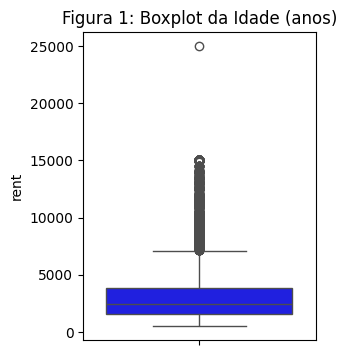

In [ ]:
fig, axs = plt.subplots(figsize=(3, 4))

sns.boxplot(data=df_cod, y='rent', color='blue')
axs.set_title('Figura 1: Boxplot da Idade (anos)')

Nota-se que há valores outliers. Vamos investigar a necessidade de substituí-los, começando pelo valor máximo.

In [ ]:
max_rent = df_cod.query('rent == rent.max()')
max_rent

,district,area,bedrooms,garage,rent,type_apartamento,type_casa,type_studio_e_kitnet
6095,Planalto Paulista,24,1,0,25000,0,0,1


Como é implausível que haja um studio/kitnet com um aluguel de R$ 25.000,00, vamos dropar essa informação do dataframe.

In [ ]:
indice = max_rent.index
df_sem_out = df_cod.drop(indice)

### Verificando Outliers

In [ ]:
#definindo os limites superiores e inferiores
Q1 = df_sem_out['rent'].quantile(.25)
Q3 = df_sem_out['rent'].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q1 + 1.5*IQR

In [ ]:
#filtrando os valores abaixo do limite inferior e acima do limite superior
outliers_index = (df_sem_out['rent'] < limite_inferior) | (df_sem_out['rent'] > limite_superior)
df_sem_out[outliers_index]

,district,area,bedrooms,garage,rent,type_apartamento,type_casa,type_studio_e_kitnet
95,Bosque da Saúde,209,3,2,6000,0,1,0
100,Jardim das Acácias,209,4,2,6950,0,1,0
123,Ipiranga,120,3,3,5500,0,1,0
156,Barra Funda,69,2,2,5390,1,0,0
200,Pacaembu,350,4,2,10400,0,1,0
...,...,...,...,...,...,...,...,...
11649,Paraíso do Morumbi,237,4,3,12500,1,0,0
11650,Panamby,360,5,4,9375,1,0,0
11651,Alto da Boa Vista,158,4,2,6500,1,0,0
11653,Jardim Vitória Régia,350,4,4,11250,1,0,0


O dataframe apresenta 1899 valores outliers, mas não iremos deletá-los de nosso dataframe por, aparentemente, representarem valores plausíveis de alugueis.

Prosseguiremos com esse conjunto de dados.

##Tratando a coluna 'district'

### Limpando as strings

Deixando os valores em minúsculo e sem espaço

In [ ]:
df_sem_out['district'] = df_sem_out['district'].str.lower().str.replace(' ', '')

Vamos usar o unicode para substituir o 'ç' e as vogais acentuadas pelas letras correspondentes

In [ ]:
df_sem_out['district'] = df_sem_out['district'].apply(lambda x: unidecode(x))

### Dropando dados duplicados

In [ ]:
df_sem_out.duplicated().sum()

41

In [ ]:
df_sem_out.drop_duplicates(inplace=True)

In [ ]:
df_sem_out.duplicated().sum()

0

### Analisando os bairros

Descobrindo quantos valores únicos temos na coluna 'district'

In [ ]:
df_sem_out['district'].value_counts()

district
belavista         348
vilamariana       230
jardimpaulista    219
centro            175
pinheiros         156
                 ... 
hortoflorestal      1
santarita           1
jardiminga          1
jardimdocarmo       1
retiromorumbi       1
Name: count, Length: 1086, dtype: int64

No nosso banco, há 1086 bairros únicos.

Vamos identificar quantos bairros possuem uma frequência menor que 50.

In [ ]:
frequencia_bairros = df_sem_out['district'].value_counts()
bairros_baixa_frequencia = frequencia_bairros[frequencia_bairros <= 50]
print("Número de bairros que aparecem menos de 50 vezes:", bairros_baixa_frequencia.sum())

Número de bairros que aparecem menos de 50 vezes: 7206


Dropando os bairros com baixa frequência

In [ ]:
bairros_dropar = bairros_baixa_frequencia.index

In [ ]:
indice = df_sem_out['district'].isin(bairros_dropar)

In [ ]:
df_filtrado = df_sem_out[~indice].copy()
df_filtrado.reset_index(drop=True, inplace=True)
df_filtrado

,district,area,bedrooms,garage,rent,type_apartamento,type_casa,type_studio_e_kitnet
0,pinheiros,18,1,0,4000,1,0,0
1,belavista,19,1,0,4000,0,0,1
2,bras,50,2,1,3800,1,0,0
3,centro,26,1,0,1727,0,0,1
4,se,63,2,0,1500,1,0,0
...,...,...,...,...,...,...,...,...
4360,santoamaro,70,2,1,3120,1,0,0
4361,santoamaro,70,2,0,2230,1,0,0
4362,santoamaro,180,4,2,4700,0,1,0
4363,santoamaro,94,2,1,4100,1,0,0


In [ ]:
frequencia = df_filtrado['district'].value_counts()
frequencia

district
belavista                    348
vilamariana                  230
jardimpaulista               219
centro                       175
pinheiros                    156
consolacao                   154
santana                      150
santoamaro                   146
mooca                        146
bras                         143
cerqueiracesar               140
liberdade                    139
vilaandrade                  129
republica                    122
camposeliseos                115
vilasuzana                   114
perdizes                     111
campobelo                    107
cambuci                      104
tatuape                       97
vilaprudente                  96
vilabuarque                   90
paraiso                       89
vilaolimpia                   87
barrafunda                    82
vilaregentefeijo              82
vilaclementino                80
indianopolis                  79
vilanovaconceicao             77
ipiranga                      76
s

In [ ]:
frequencia.count()

38

Após o tratamento, a coluna 'district' ficou com 33 bairros.

Vamos seguir com a atribuição das colunas binárias para cada bairro distinto do nosso novo dataframe:

In [ ]:
df_tratado = pd.get_dummies(df_filtrado, columns=['district'], dtype=int).copy()
df_tratado

,area,bedrooms,garage,rent,type_apartamento,type_casa,type_studio_e_kitnet,district_barrafunda,district_belavista,district_bras,...,district_vilaclementino,district_viladasaude,district_vilaformosa,district_vilamariana,district_vilanovaconceicao,district_vilaolimpia,district_vilaprudente,district_vilaregentefeijo,district_vilasantacatarina,district_vilasuzana
0,18,1,0,4000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19,1,0,4000,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,50,2,1,3800,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,26,1,0,1727,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,2,0,1500,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,70,2,1,3120,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4361,70,2,0,2230,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4362,180,4,2,4700,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4363,94,2,1,4100,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**2. Análise Exploratória dos Dados**

##Variável Categórica 'type'

In [ ]:
#calculando a frequência absoluta
apartamento = df_tratado['type_apartamento'].value_counts()
kitnet = df_tratado['type_studio_e_kitnet'].value_counts()
casa = df_tratado['type_casa'].value_counts()

In [ ]:
#calculando a frequência relativa
relativa_apartamento = df_tratado['type_apartamento'].value_counts(normalize=True).round(4)
relativa_kitnet = df_tratado['type_studio_e_kitnet'].value_counts(normalize=True).round(4)
relativa_casa = df_tratado['type_casa'].value_counts(normalize=True).round(4)

In [ ]:
#extraindo somente a informação onde o type seja =1
absoluta_apartamento = apartamento.get(1, 0)
absoluta_kitnet = kitnet.get(1, 0)
absoluta_casa = casa.get(1, 0)

In [ ]:
#extraindo somente a informação onde o type seja =1
porcentagem_apartamento = relativa_apartamento.get(1, 0)
porcentagem_kitnet = relativa_kitnet.get(1, 0)
porcentagem_casa = relativa_casa.get(1, 0)

In [ ]:
tab_frequencia = pd.DataFrame({
    'Tipo de Imóvel': ['Apartamento', 'Studio e Kitnet', 'Casa'],
    'Frequência Absoluta': [absoluta_apartamento, absoluta_kitnet, absoluta_casa],
    'Porcentagem (%)': [porcentagem_apartamento, porcentagem_kitnet, porcentagem_casa]
})

tab_frequencia

,Tipo de Imóvel,Frequência Absoluta,Porcentagem (%)
0,Apartamento,3098,0.7097
1,Studio e Kitnet,861,0.1973
2,Casa,406,0.0930


Text(0.5, 1.0, 'Distribuição do Tipo de Imóvel Alugado (%)')

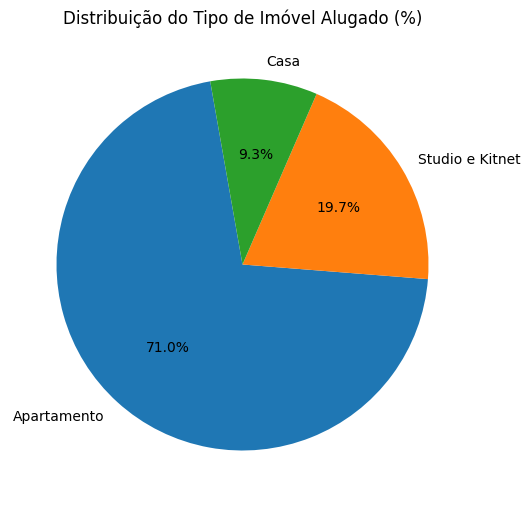

In [ ]:
fig, axs = plt.subplots(figsize=(6, 8))

axs.pie(tab_frequencia['Porcentagem (%)'], labels=tab_frequencia['Tipo de Imóvel'], autopct='%1.1f%%', startangle=100)
axs.set_title('Distribuição do Tipo de Imóvel Alugado (%)')

**Interpretação**

A análise dos dados indica que a maioria dos imóveis para aluguel são apartamentos (71,0%), seguidos por studios e kitnets (19,7%) e casas (9,3%). Essa distribuição sugere uma maior preferência ou maior disponibilidade de imóveis alugados do tipo apartamento em São Paulo.

##Estatística Descritiva: Variáveis Quantitativas

Selecionando as colunas que serão utilizadas na estatística descritiva

In [ ]:
df_est_descr = df_tratado[['area', 'bedrooms', 'garage', 'rent']]

###Medidas de Posição

In [ ]:
media = df_est_descr.mean().round(2)
mediana = df_est_descr.median().round(2)
moda = df_est_descr.mode().round(2).iloc[0]

In [ ]:
tab_med_posicao = pd.DataFrame({
    'Variável': df_est_descr.columns,
    'Média': media.values,
    'Mediana': mediana.values,
    'Moda': moda.values
})

tab_med_posicao

,Variável,Média,Mediana,Moda
0,area,77.43,55.0,40
1,bedrooms,1.79,2.0,1
2,garage,0.90,1.0,1
3,rent,3683.54,2800.0,3000


**Interpretação**

* *Área:* A área média dos imóveis é de aproximadamente 77.43 m². A mediana de 55.0 m² indica que metade dos imóveis têm uma área menor ou igual a 55 m², enquanto a moda de 40 m² revela que essa é a área mais comum entre os imóveis analisados.

* *Quartos:* Em média, os imóveis possuem 1.79 quartos. A mediana igual a 2 indica que metade dos imóveis têm 2 quartos. A moda igual a 1 sugere que a maioria dos imóveis têm um único quarto.

* *Garagem:* A mediana e moda iguais a 1 indicam que muitos imóveis possuem uma vaga de garagem.

* *Aluguel:* O valor médio do aluguel é de 3683.10. A mediana de 2800.0 indica que metade dos aluguéis estão abaixo desse valor. A moda de 3000 sugere que este é o valor de aluguel mais frequentemente observado entre os imóveis.

###Medidas de Dispersão

In [ ]:
variancia = df_est_descr.var().round(2)
desv_pad = df_est_descr.std().round(2)
coef_var = (desv_pad / media * 100).round(2)

In [ ]:
tab_med_dispersao = pd.DataFrame({
    'Variável': df_est_descr.columns,
    'Variância': variancia.values,
    'Desvio Padrão': desv_pad.values,
    'Coeficiente de Variação (%)': coef_var.values
})

tab_med_dispersao

,Variável,Variância,Desvio Padrão,Coeficiente de Variação (%)
0,area,4486.64,66.98,86.50
1,bedrooms,0.83,0.91,50.84
2,garage,0.99,1.00,111.11
3,rent,7845646.89,2801.01,76.04


**Interpretação**

* *Área:* A variância e o desvio padrão indicam uma dispersão significativa em torno da média de área dos imóveis. O coeficiente de variação de 86.5% mostra que há uma alta variabilidade na área dos imóveis alugados.

* *Quartos:*  O desvio padrão de 0.91 quartos indica uma variabilidade moderada em relação à média. O coeficiente de variação de 50.84% sugere que a variabilidade no número de quartos é considerável, mas menor do que a variabilidade na área.

* *Garagem:* O desvio padrão de 1 vaga indica uma variabilidade moderada, similar à dos quartos. No entanto, o coeficiente de variação de 111.11% revela uma altíssima variabilidade relativa, indicando que a presença e quantidade de vagas na garagem é muito inconsistente;

* *Aluguel:* A variância e o desvio padrão indicam uma grande dispersão nos valores de aluguel. O coeficiente de variação de 76.04% mostra que, apesar da alta variabilidade absoluta, a variabilidade relativa dos aluguéis é a menor.

##Matriz de Correlação

In [ ]:
df_est_descr.corr().round(4)

,area,bedrooms,garage,rent
area,1.0000,0.7661,0.7182,0.6658
bedrooms,0.7661,1.0000,0.6338,0.5577
garage,0.7182,0.6338,1.0000,0.6171
rent,0.6658,0.5577,0.6171,1.0000


**Interpretação**

* A forte correlação entre área e quartos sugere que imóveis maiores geralmente possuem mais quartos, o que é esperado.

* A área tem uma correlação moderada com o aluguel, indicando que imóveis maiores tendem a ter aluguéis mais altos.

* A correlação moderada entre quartos e garagem sugere que imóveis com mais quartos também tendem a ter mais vagas na garagem.

* A moderada correlação entre número de vagas na garagem e aluguel indica que a disponibilidade de garagem é um fator relevante para o valor do aluguel.

##Comportamento da Variável Dependente (y) 'rent'

### Boxplot do Aluguel

<Axes: title={'center': 'Aluguel'}, ylabel='R$'>

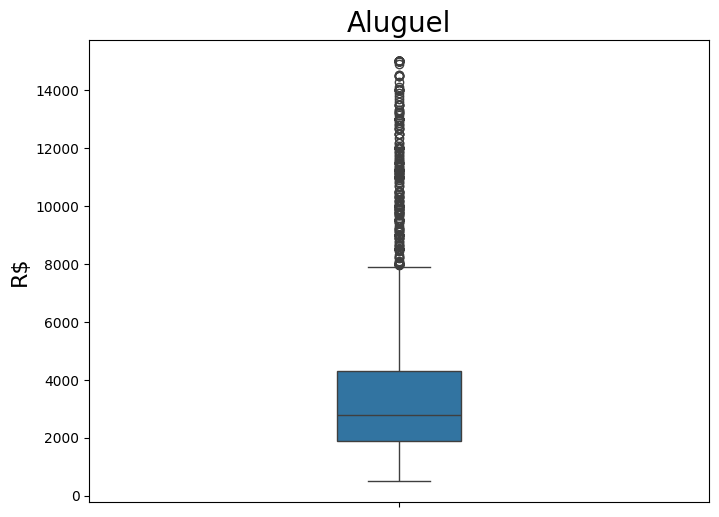

In [ ]:
ax = sns.boxplot(data=df_tratado['rent'], orient='v', width=0.2)
ax.figure.set_size_inches(8, 6)
ax.set_title('Aluguel', fontsize=20)
ax.set_ylabel('R$', fontsize=16)
ax

###Histograma de 'rent'

Text(0.5, 1.0, 'Figura 1: Histograma do Preço do Aluguel(R$)')

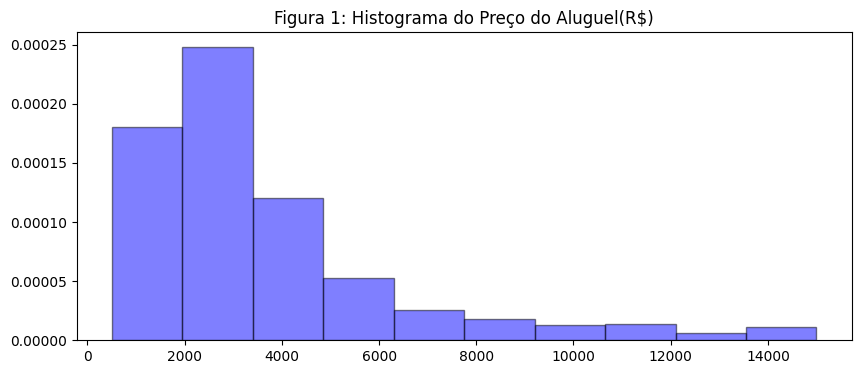

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

#Histograma do Aluguel
ax.hist(data = df_tratado, x ='rent', color='blue', histtype='bar', rwidth=2, edgecolor='black', density = True, alpha = .5)
ax.set_title('Figura 1: Histograma do Preço do Aluguel(R$)')

###Aluguel x Número de Quartos

<Axes: title={'center': 'Aluguel por Número de Quartos'}, xlabel='N. de Quartos', ylabel='R$'>

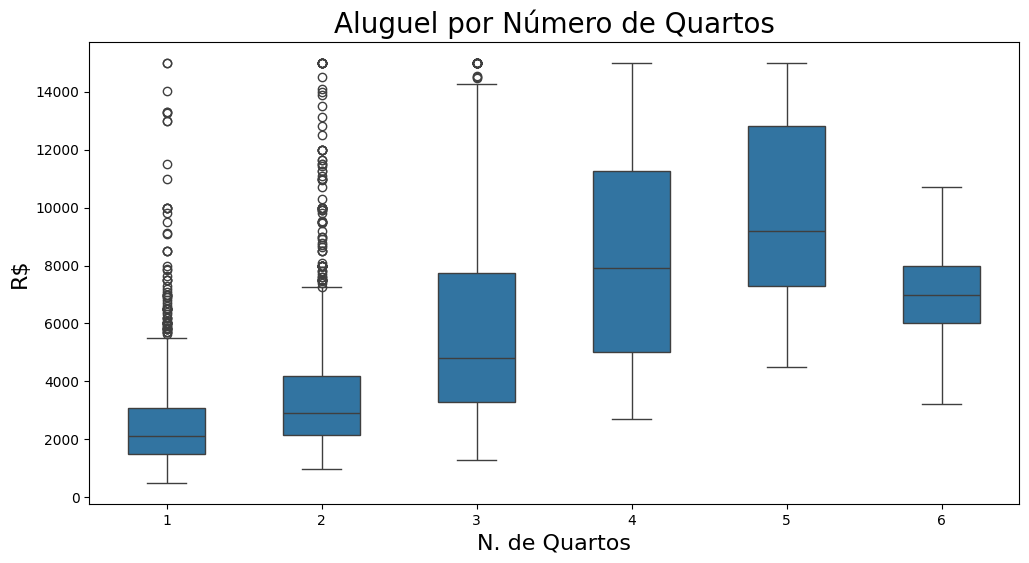

In [ ]:
ax = sns.boxplot(y='rent', x='bedrooms', data=df_tratado, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aluguel por Número de Quartos', fontsize=20)
ax.set_ylabel('R$', fontsize=16)
ax.set_xlabel('N. de Quartos', fontsize=16)
ax

###Aluguel x Garagem

<Axes: title={'center': 'Aluguel por Vagas de Garagem'}, xlabel='Vagas de Garagem', ylabel='R$'>

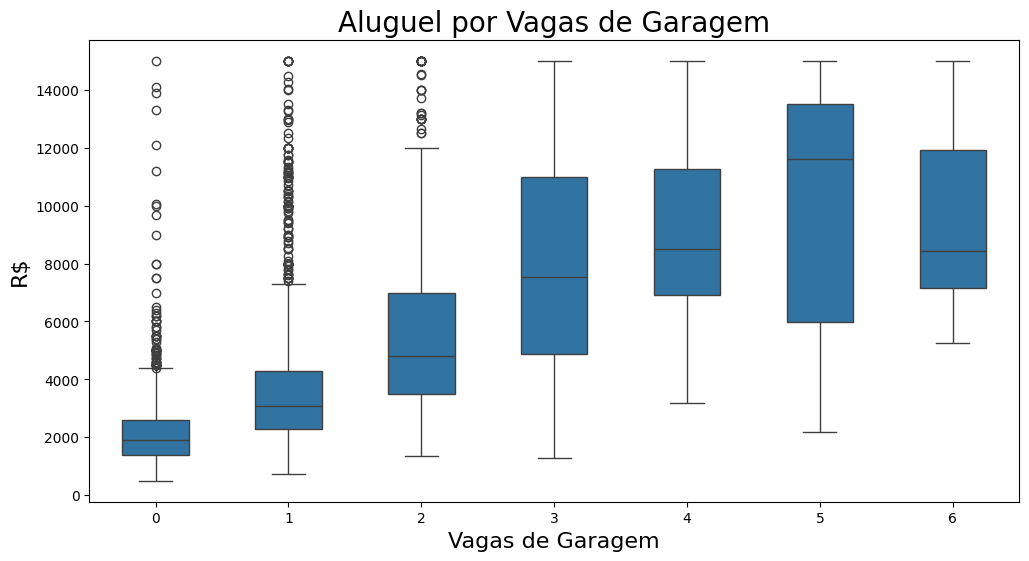

In [ ]:
ax = sns.boxplot(y='rent', x='garage', data=df_tratado, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aluguel por Vagas de Garagem', fontsize=20)
ax.set_ylabel('R$', fontsize=16)
ax.set_xlabel('Vagas de Garagem', fontsize=16)
ax

### Aluguel x Tipo de Imóvel

In [ ]:
df_apartamento = df_tratado.query('type_apartamento == 1')
df_casa = df_tratado.query('type_casa == 1')
df_studio = df_tratado.query('type_studio_e_kitnet == 1')

Text(0.5, 1.0, 'Figura 3: Aluguel das Casas')

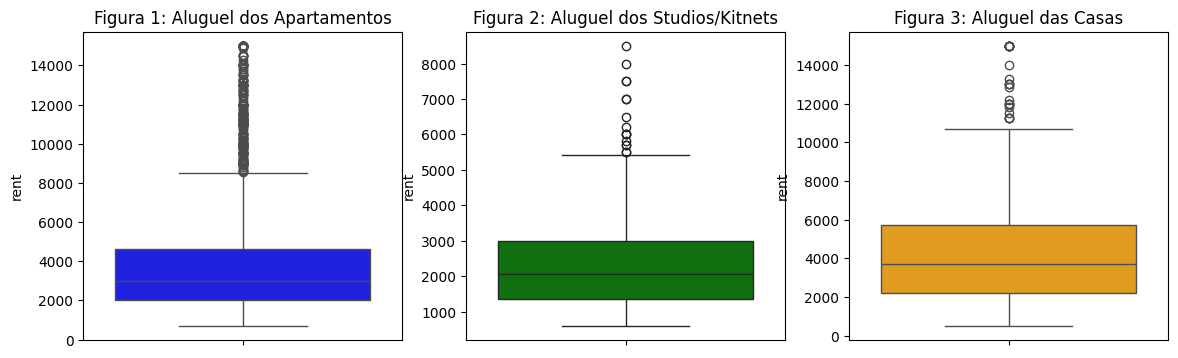

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

#Boxplot da Apartamento
axs[0] = sns.boxplot(y='rent', data=df_apartamento, ax=axs[0], color='blue')
axs[0].set_title('Figura 1: Aluguel dos Apartamentos')

#Boxplot da Studio
axs[1] = sns.boxplot(data=df_studio, y='rent', ax=axs[1], color='green')
axs[1].set_title('Figura 2: Aluguel dos Studios/Kitnets')

#Boxplot da Casa
axs[2] = sns.boxplot(data=df_casa, y='rent', ax=axs[2], color='orange')
axs[2].set_title('Figura 3: Aluguel das Casas')

As casas são o tipo de imóvel que possuem um aluguel maior em comparação com os apartamentos e Studios/Kitnets.

### Aluguel x Área

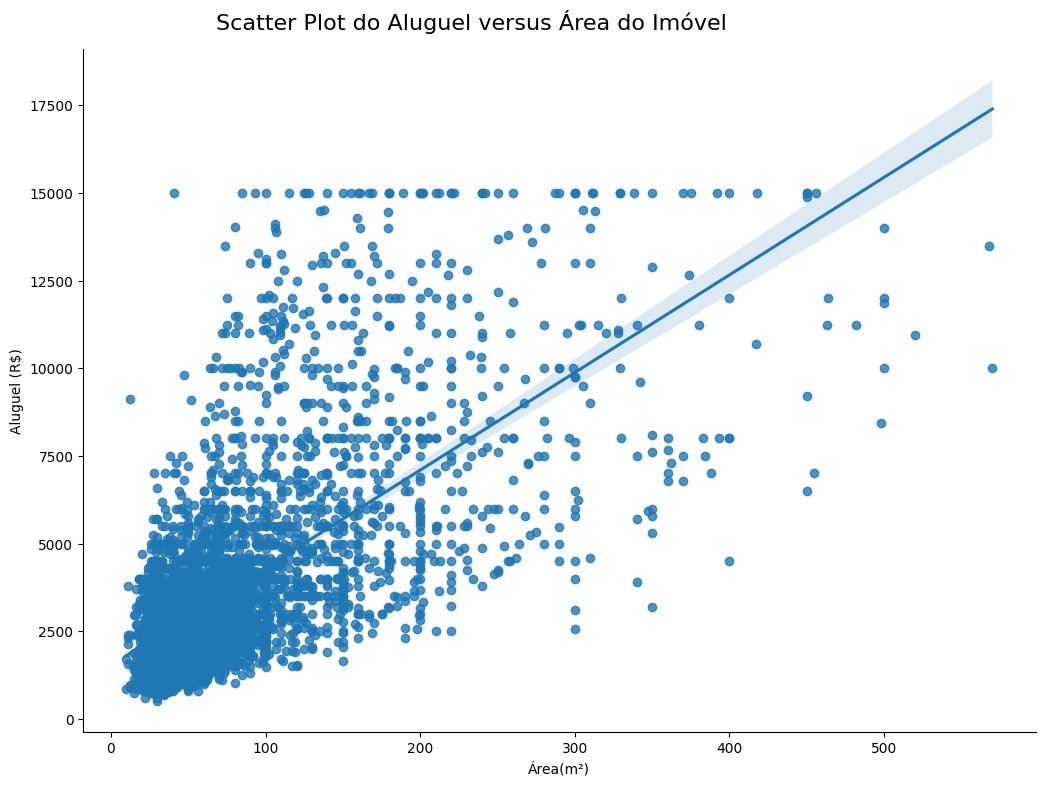

In [ ]:
ax = sns.lmplot(x='area', y='rent', data=df_tratado)
ax.fig.set_size_inches(12, 8)
ax.fig.suptitle('Scatter Plot do Aluguel versus Área do Imóvel', fontsize=16, y=1.02)
ax.set_xlabels("Área(m²)", fontsize=10)
ax.set_ylabels("Aluguel (R$)", fontsize=10)
ax

**Interpretação**

A área dos imóveis está mais concentrada entre 10m² e 100m². Percebe-se uma relação diretamento proporcional entre a área a o valor do aluguel.

##Comportamento das Variáveis Independentes (x)

###Histogramas de 'area', 'bedrooms', 'garage'

Text(0.5, 1.0, 'Figura 3: Histograma do Número de Vagas de Garagem')

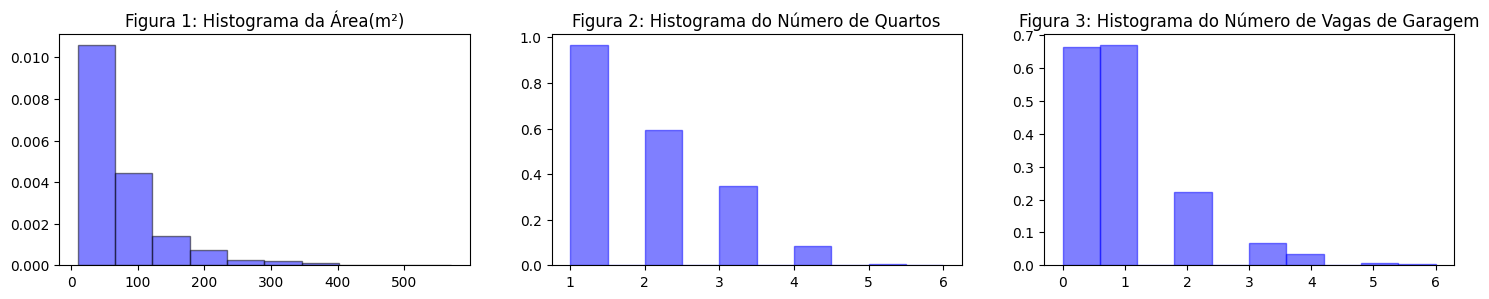

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 3))

#Histograma da Área
axs[0].hist(data = df_tratado, x ='area', color='blue', histtype='bar', rwidth=2, edgecolor='black', density = True, alpha = .5)
axs[0].set_title('Figura 1: Histograma da Área(m²)')

#Histograma dos Quartos
axs[1].hist(data = df_tratado, x ='bedrooms', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
axs[1].set_title('Figura 2: Histograma do Número de Quartos')

#Histograma da Garagem
axs[2].hist(data = df_tratado, x ='garage', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
axs[2].set_title('Figura 3: Histograma do Número de Vagas de Garagem')

# **3. Estimando um Modelo de Regressão Linear**

##Aplicando a transformação logarítimica a 'rent' e 'area'

Vamos aplicar uma trnasformação logaritimica para transformar alguns dos dados numéricos a fim de normalizá-los.

In [ ]:
df_tratado['log_rent'] = np.log(df_tratado['rent'])
df_tratado['log_area'] = np.log(df_tratado['area'])

<ipython-input-227-1aca1bac72e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_tratado['log_rent'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='log do Aluguel', ylabel='Density'>

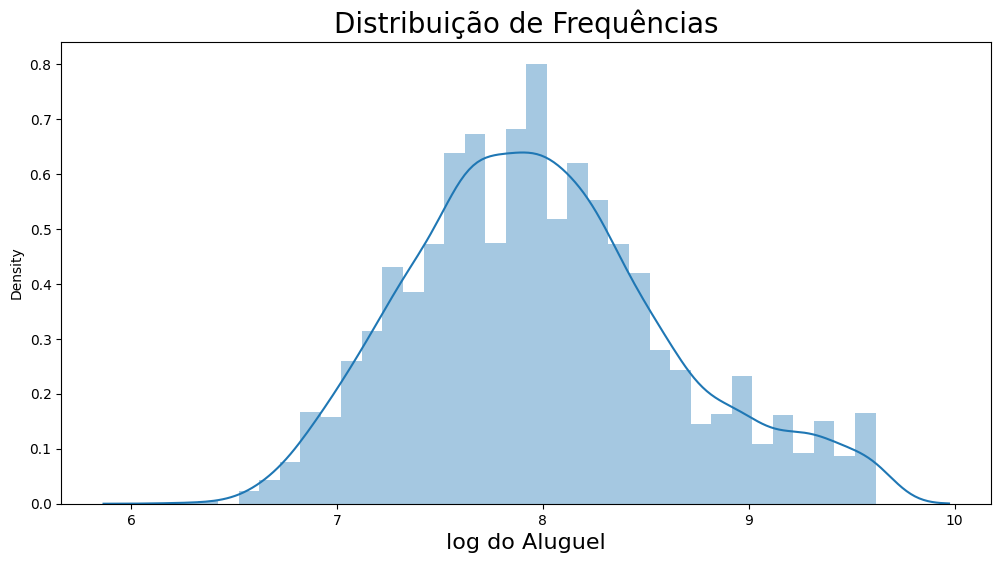

In [ ]:
ax = sns.distplot(df_tratado['log_rent'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Aluguel', fontsize=16)
ax

<ipython-input-228-3d5f1900dfe4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_tratado['log_area'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='log da Área', ylabel='Density'>

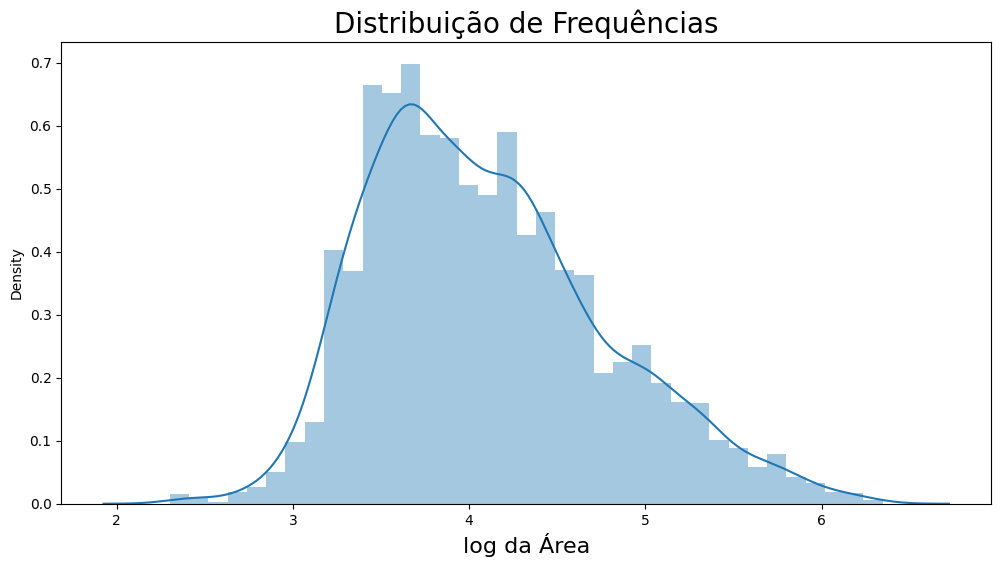

In [ ]:
ax = sns.distplot(df_tratado['log_area'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log da Área', fontsize=16)
ax

## Importando pacotes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

## Definindo variável dependente (y) e variáveis explicativas (x)

In [ ]:
y = df_tratado['log_rent']

In [ ]:
X = df_tratado.drop(columns=['rent', 'log_rent', 'area'])

Criando os datasets de treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Estimando o modelo com statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
X_train_com_constante

,const,bedrooms,garage,type_apartamento,type_casa,type_studio_e_kitnet,district_barrafunda,district_belavista,district_bras,district_cambuci,...,district_viladasaude,district_vilaformosa,district_vilamariana,district_vilanovaconceicao,district_vilaolimpia,district_vilaprudente,district_vilaregentefeijo,district_vilasantacatarina,district_vilasuzana,log_area
809,1.0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.688879
2949,1.0,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.867534
2086,1.0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.555348
682,1.0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.806662
3335,1.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.688879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1.0,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.262680
466,1.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.637586
3092,1.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.044522
3772,1.0,3,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.605170


In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

Avaliando o modelo estimado:

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     171.7
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:06:34   Log-Likelihood:                -1405.0
No. Observations:                3492   AIC:                             2896.
Df Residuals:                    3449   BIC:                             3161.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Os p-valores que estiverem maiores ou iguais a 0.05 não são estatisticamente significativos ao modelo. Vamos dropar as variáveis que se encaixam nessa descrição:

In [ ]:
colunas = ['rent',
           'log_rent',
           'area',
           'district_ipiranga',
           'district_jabaquara',
           'district_mooca',
           'district_republica',
           'district_santacecilia',
           'district_santana',
           'district_tatuape',
           'district_vilaandrade',
           'district_vilabuarque',
           'district_viladasaude',
           'district_vilaregentefeijo',
           'district_vilasantacatarina',
           'district_cambuci',
           'district_vilaprudente',
           'district_vilasuzana',
           'district_bras',
           'district_centrohistoricodesaopaulo']

X = df_tratado.drop(columns=colunas)

Refazendo os passos da estimação do modelo:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     276.0
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:22:01   Log-Likelihood:                -1415.9
No. Observations:                3492   AIC:                             2886.
Df Residuals:                    3465   BIC:                             3052.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Aplicando o modelo de Regressão Linear com os dados selecionados

Instanciando a classe LinearRegression()

In [ ]:
modelo = LinearRegression()

Utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

Obtendo o Coeficiente de Determinação (R²)

In [ ]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.67


o R² é uma medida resumida que diz quanto a linha de regressão se ajusta aos dados. No nosso caso, o modelo se ajusta em 67% aos dados.

## Gerando previsões para os dados de teste (X_test)

In [ ]:
y_previsto = modelo.predict(X_test)

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


Nosso modelo de regressão previu 47% dos dados do dataset de teste.

##Previsões Pontuais

In [ ]:
entrada = X_test[0:1]
entrada

,bedrooms,garage,type_apartamento,type_casa,type_studio_e_kitnet,district_barrafunda,district_belavista,district_campobelo,district_camposeliseos,district_centro,...,district_perdizes,district_pinheiros,district_santoamaro,district_se,district_vilaclementino,district_vilaformosa,district_vilamariana,district_vilanovaconceicao,district_vilaolimpia,log_area
1551,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2.995732


In [ ]:
valor_previsto = modelo.predict(entrada)[0]
valor_previsto

7.408203125

Note que a previsão retornou o valor padronizado do aluguel. Vamos revertê-lo:


In [ ]:
valor_original = np.exp(valor_previsto)

print(f"Valor original em reais: R$ {valor_original:.2f}")

Valor original em reais: R$ 1649.46


##Coeficientes Estimados

In [ ]:
modelo.intercept_

1343094043501.0688

In [ ]:
modelo.coef_

array([ 6.31186519e-02,  1.97257225e-01, -1.34309404e+12, -1.34309404e+12,
       -1.34309404e+12,  1.89072081e-01,  1.77493483e-01,  2.71694780e-01,
       -2.04650360e-01, -8.89843477e-02,  7.39922643e-01,  4.30243644e-01,
        5.23187267e-01,  7.44927736e-01,  5.57780259e-01, -1.00711584e-01,
        4.87937152e-01,  3.67275862e-01,  5.91010322e-01,  2.49389720e-01,
       -2.46221367e-01,  2.50245031e-01, -2.00325775e-01,  4.03704306e-01,
        6.97997945e-01,  5.48750457e-01,  3.19260168e-01])

In [ ]:
index = list(X.columns)
index.insert(0,'Intercepto')

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,1.343094e+12
bedrooms,6.311865e-02
garage,1.972572e-01
type_apartamento,-1.343094e+12
type_casa,-1.343094e+12
type_studio_e_kitnet,-1.343094e+12
district_barrafunda,1.890721e-01
district_belavista,1.774935e-01
district_campobelo,2.716948e-01
district_camposeliseos,-2.046504e-01


Note que os parâmetros de nosso modelo apresentam valores muito elevado ou muito baixo. Vamos comparar com um modelo alternativo.

##Modificando o Modelo e Avaliando Novamente o Ajuste

Vamos testar com um modelo alternativo que contenha apenas os 10 bairros com mais imóveis alugados:

###Criando um novo conjunto de variáveis explicativas e dependentes

In [ ]:
top_10_bairros = frequencia.head(10).index
df_limitado = df_filtrado[df_filtrado['district'].isin(top_10_bairros)].copy()
df_limitado['log_rent'] = np.log(df_limitado['rent'])
df_limitado['log_area'] = np.log(df_limitado['area'])
df_limitado = pd.get_dummies(df_limitado, columns=['district'], dtype=int).copy()
df_limitado.reset_index(drop=True, inplace=True)

In [ ]:
y2 = df_limitado['log_rent']

In [ ]:
X2 = df_limitado.drop(columns=['area','rent','log_rent'])

### Estimando o novo modelo com statsmodels

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state = 42)
X2_train_com_constante = sm.add_constant(X2_train)

modelo_statsmodels = sm.OLS(y2_train, X2_train_com_constante, hasconst = True).fit()

print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     184.4
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          8.42e-312
Time:                        16:28:23   Log-Likelihood:                -659.80
No. Observations:                1493   AIC:                             1350.
Df Residuals:                    1478   BIC:                             1429.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Estimando o Modelo com os Dados de Treino

In [ ]:
modelo2 = LinearRegression()

modelo2.fit(X2_train, y2_train)

print('R² = {}'.format(modelo2.score(X2_train, y2_train).round(2)))

R² = 0.64


Nosso novo modelo agora se ajusta em 64% aos dados.

###Gerando Previsões para os dados de TESTE

In [ ]:
y2_previsto = modelo2.predict(X2_test)

In [ ]:
print(f'R²: {metrics.r2_score(y2_test, y2_previsto).round(3)}')

R²: 0.591


O modelo agora previu 59% dos dados de teste.

###Coeficientes do novo modelo

In [ ]:
modelo2.intercept_

6.470027055405066

In [ ]:
np.exp(modelo2.intercept_)

645.501191025006

In [ ]:
modelo.coef_

array([ 6.31186519e-02,  1.97257225e-01, -1.34309404e+12, -1.34309404e+12,
       -1.34309404e+12,  1.89072081e-01,  1.77493483e-01,  2.71694780e-01,
       -2.04650360e-01, -8.89843477e-02,  7.39922643e-01,  4.30243644e-01,
        5.23187267e-01,  7.44927736e-01,  5.57780259e-01, -1.00711584e-01,
        4.87937152e-01,  3.67275862e-01,  5.91010322e-01,  2.49389720e-01,
       -2.46221367e-01,  2.50245031e-01, -2.00325775e-01,  4.03704306e-01,
        6.97997945e-01,  5.48750457e-01,  3.19260168e-01])

In [ ]:
index = list(X2.columns)
index.insert(0,'Intercepto')

In [ ]:
pd.DataFrame(data=np.append(modelo2.intercept_, modelo2.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,6.470027
bedrooms,0.086204
garage,0.194903
type_apartamento,0.021928
type_casa,-0.063570
type_studio_e_kitnet,0.041642
log_area,0.296555
district_belavista,-0.030779
district_bras,-0.285386
district_centro,-0.316677


### Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas, o efeito médio no Valor do Aluguel dos Imóveis seria de <b>R$ 645,50</b> (exp[645.501191025006]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Quartos</b> → Mantendo-se o demais valores constante, o acréscimo de 1 quarto no imóvel gera, em média, um acréscimo de <b>8,6%</b> no Valor do Aluguel do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Garagem</b> → Mantendo-se o demais valores constante, o acréscimo de 1 vaga de garagem no imóvel gera, em média, um acréscimo de <b>19,5%</b> no Valor do Aluguel do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Apartamento</b> → Mantendo-se o demais valores constante, se o imóvel for do tipo apartamento, o Valor do Aluguel do Imóvel aumenta em <b>2,19%</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Casa</b> → Mantendo-se o demais valores constante, se o imóvel for do tipo casa, o Valor do Aluguel do Imóvel cai em <b>6,3%</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Studio/Kitnet</b> → Mantendo-se o demais valores constante, se o imóvel for do tipo Studio/Kitnet, o Valor do Aluguel do Imóvel aumenta em <b>4,2%</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o demais valores constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>29,6%</b> no Preço do Alguel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Bairro Bela Vista</b> → Mantendo-se o demais valores constante, se o imóvel estiver localizado no bairro de Bela Vista, o Valor do Aluguel cai em <b>3,1%</b>
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Bairro Brás</b> → Mantendo-se o demais valores constante, se o imóvel estiver localizado no bairro de Brás, o Valor do Aluguel cai em <b>28,5%</b>
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Bairro Centro</b> → Mantendo-se o demais valores constante, se o imóvel estiver localizado no bairro de Centro, o Valor do Aluguel cai em <b>31,7%</b>
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Bairro Consolação</b> → Mantendo-se o demais valores constante, se o imóvel estiver localizado no bairro de Consolação, o Valor do Aluguel aumenta em <b>18,5%</b>
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Bairro Jardim Paulista</b> → Mantendo-se o demais valores constante, se o imóvel estiver localizado no bairro de Jardim Paulista, o Valor do Aluguel aumenta em <b>37,5%</b>
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Bairro Mooca</b> → Mantendo-se o demais valores constante, se o imóvel estiver localizado no bairro de Mooca, o Valor do Aluguel cai em <b>21,2%</b>
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Bairro Pinheiros</b> → Mantendo-se o demais valores constante, se o imóvel estiver localizado no bairro de Pinheiros, o Valor do Aluguel aumenta em <b>39,4%</b>
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Bairro Santana</b> → Mantendo-se o demais valores constante, se o imóvel estiver localizado no bairro de Santana, o Valor do Aluguel cai em <b>25,2%</b>
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Bairro Santo Amaro</b> → Mantendo-se o demais valores constante, se o imóvel estiver localizado no bairro de Santo Amaro, o Valor do Aluguel cai em <b>2,2%</b>
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Bairro Vila Mariana</b> → Mantendo-se o demais valores constante, se o imóvel estiver localizado no bairro de Vila Mariana, o Valor do Aluguel aumenta em <b>16,6%</b>
</p>

###Análises Gráficas das Previsões do Modelo

In [ ]:
y_previsto_train = modelo.predict(X_train)

####Scatterplot

<Axes: title={'center': 'Previsão X Real'}, xlabel='Aluguel (R$) - Previsão', ylabel='Aluguel (R$) - Real'>

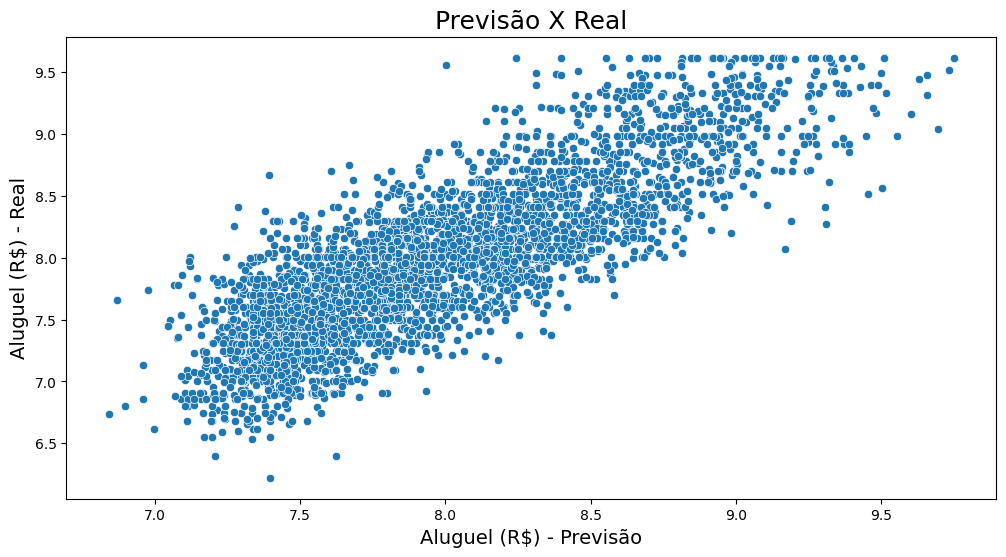

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Aluguel (R$) - Previsão', fontsize=14)
ax.set_ylabel('Aluguel (R$) - Real', fontsize=14)
ax

####Obtendo o Resíduo

In [ ]:
residuo = y_train - y_previsto_train

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Aluguel (R$) - Previsão', ylabel='Resíduos'>

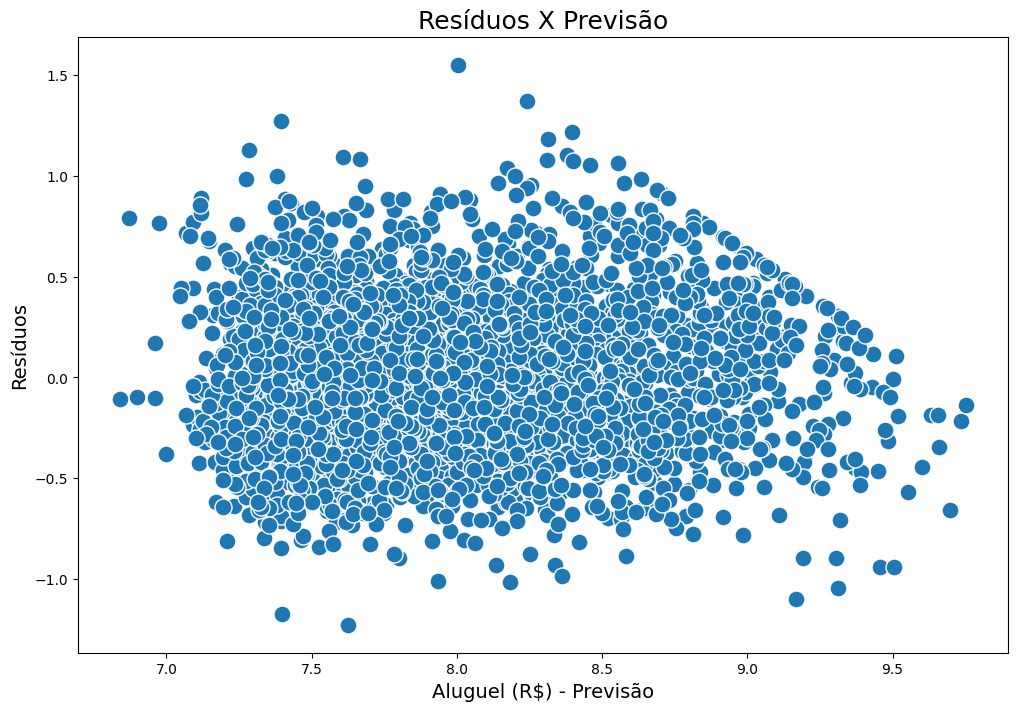

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(12, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Aluguel (R$) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

Resíduo ao quadrado

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Aluguel (R$) - Previsão', ylabel='Resíduos²'>

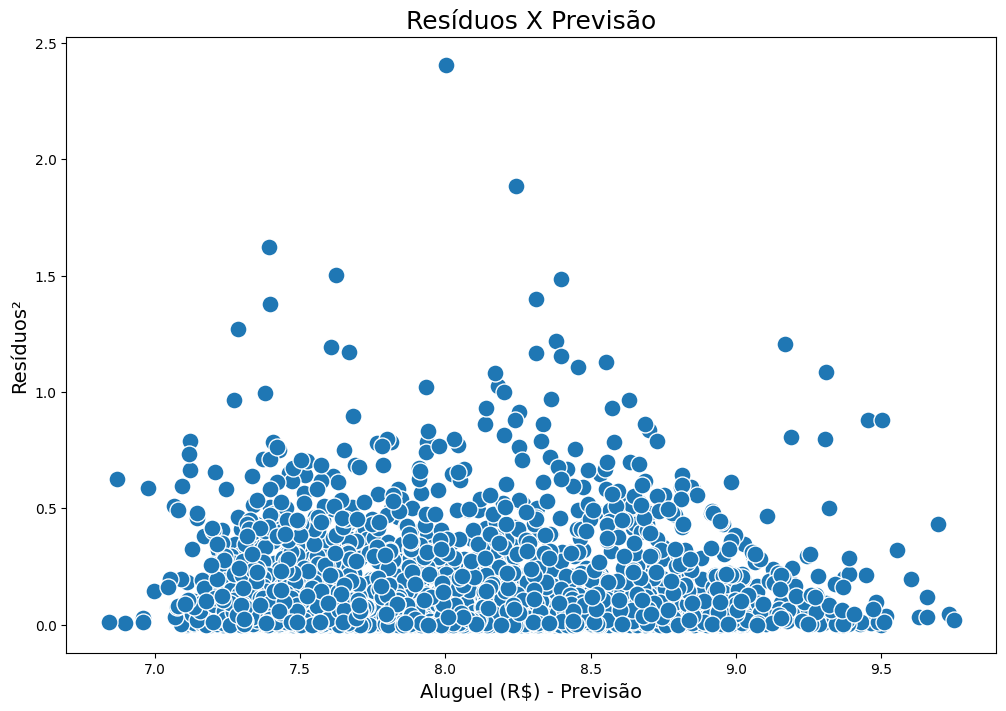

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(12, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Aluguel (R$) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

Distribuição de frequência dos resíduos

<ipython-input-306-5fe1a95d23e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='R$', ylabel='Density'>

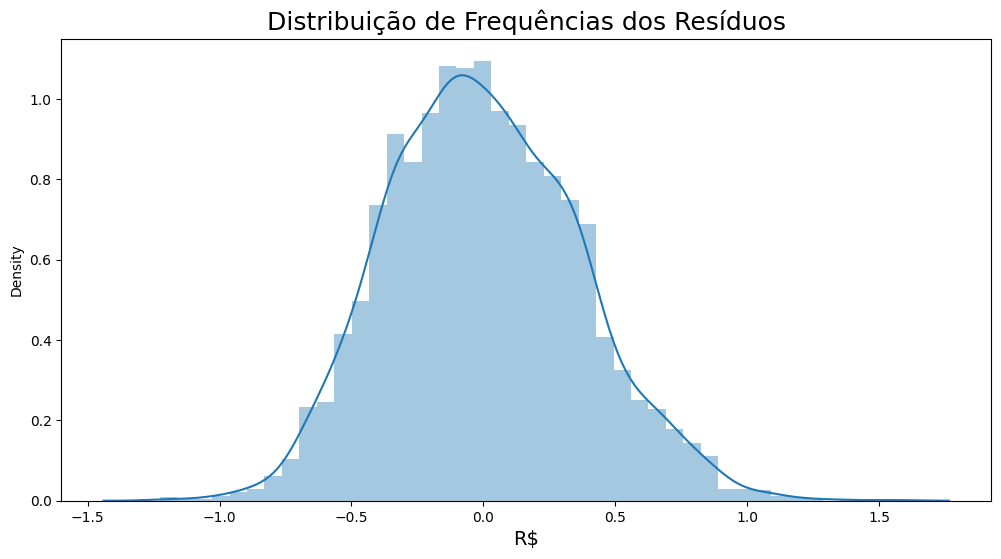

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax